In [2]:
%matplotlib inline
# import dependencies
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import cv2
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.1.0 


In [3]:
# load sample image
img = mpimg.imread(r'C:\Users\mbess\Dev\py_repo\cv\data\sample.png')

#### sample.png  
* 875w x 873h or 875 cols x 873 rows  
* 763875 pixels  
* original jpg was 24bit 96 dpi  

In [4]:
img

array([[[ 0.55686277,  0.52156866,  0.48627451],
        [ 0.55686277,  0.52156866,  0.48627451],
        [ 0.55686277,  0.52156866,  0.48627451],
        ..., 
        [ 0.56078434,  0.53333336,  0.50196081],
        [ 0.56078434,  0.53333336,  0.50196081],
        [ 0.56078434,  0.53333336,  0.50196081]],

       [[ 0.55686277,  0.52156866,  0.48627451],
        [ 0.56078434,  0.52549022,  0.49019608],
        [ 0.56078434,  0.52549022,  0.49019608],
        ..., 
        [ 0.5529412 ,  0.52549022,  0.49411765],
        [ 0.5529412 ,  0.52549022,  0.49411765],
        [ 0.5529412 ,  0.52549022,  0.49411765]],

       [[ 0.56078434,  0.53333336,  0.49411765],
        [ 0.56078434,  0.53333336,  0.49411765],
        [ 0.56078434,  0.53333336,  0.49411765],
        ..., 
        [ 0.55686277,  0.52941179,  0.49803922],
        [ 0.55686277,  0.52941179,  0.49803922],
        [ 0.55686277,  0.52941179,  0.49803922]],

       ..., 
       [[ 0.88627452,  0.88235295,  0.87450981],
        

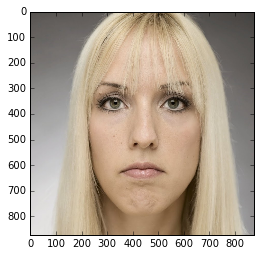

In [5]:
imgplot = plt.imshow(img)

In [ ]:
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('hot')
plt.colorbar()

In [ ]:
lumhist=plt.hist(lum_img.flatten(), 256, range=(0.0,1.0), fc='k', ec='k')

#### Histogram Study
A histogram represents the distribution of colors in an image  
x is the 256 bins, y is the pixel count.  

I make an assumption here that similar color distributions indicate similar content.  

Comparing similarity performed using one of several distance metrics.  
* Euclidean
* correlation
* Chi-squared
* intersection
* Bhattacharyya

#### cv2.calcHist function  
`cv2.calcHist(images, channels, mask, histSize, ranges)`

**images:** This is the image that we want to compute a histogram for. Wrap it as a list: [myImage].

**channels:** A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2].

**mask:** I haven’t covered masking yet in this blog yet, but essentially, a mask is a uint8  image with the same shape as our original image, where pixels with a value of zero are ignored and pixels with a value greater than zero are included in the histogram computation. Using masks allow us to only compute a histogram for a particular region of an image. For now, we’ll just use a value of None for the mask.

**histSize:** This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32].

**ranges:** The range of possible pixel values. Normally, this is [0, 256] for each channel, but if you are using a color space other than RGB (such as HSV), the ranges might be different.


In [ ]:
# imgfile = r'C:\Users\mbess\Dev\py_repo\cv\color-histograms\grant.jpg'

# load the image and show it
image = cv2.imread(r'C:\Users\mbess\Dev\py_repo\cv\color-histograms\grant.jpg')
plt.imshow(image)

the image has been correctly read by cv2 and shown by pyplot. However notice the colors don't look just right.

This is caused by a conflict of default color spaces between cv2 and pyplot

pyplot expects an image to be presented as RGB but cv2 opened the image as BGR

The cv2 function cvtColor will be used to clean up the image. cvtColor has a number of flags representing the various colorspaces, which will be printed below

In [ ]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
print(BGRflags)

In [ ]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

much better. Now to convert to gray

In [ ]:
# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Count")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

#### Flattened Color Histogram  
* **Lines 3-4:** The first thing we are going to do is split the image into its three channels: blue, green, and red. Normally, we read this is a red, green, blue (RGB). However, OpenCV stores the image as a NumPy array in reverse order: BGR. This is important to note. We then initialize a tuple of strings representing the colors.  
  
* **Lines 5-9:** Here we are just setting up our PyPlot figure and initializing our list of concatenated histograms.  
  
* **Line 12:** Let’s start looping over the channels.  
  
* **Line 16-17:** We are now computing a histogram for each channel. Essentially, this is the same as computing a histogram for a single channeled grayscale image. We then concatenate the color histogram to our features list.  
  
* **Line 20:** Plot the histogram using the current channel name.  
  
* **Line 29:** Here we are just examining the shape of our flattened color histogram. I call this a “flattened” histogram not because the (1) histogram has zero “peaks” or (2) I am calling NumPy’s flatten() method. I call this a “flattened” histogram because the histogram is a single list of pixel counts. Later, we explore multi-dimensional histograms (2D and 3D). A flattened histogram is simply the histogram for each individual channel concatenated together.  

In [ ]:
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Count")
features = []

# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)

	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])

plt.show()

# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent

print("flattened feature vector size: %d" % (np.array(features).flatten().shape))


## PIXEL

- every image is a set of pixels.
- analogous to a grid
- represented as grayscale or color



#### GRAYSCALE

- value 0 - 255
- 0 = black, 255 = white
- values closer to 0 are darker
- values closer to 255 are lighter


#### COLOR
- Often represented as the RGB colorspace.
- Many colorspaces exist, but RGB is commonplace
- consist of a tuple of three integer values between 0 - 255.
- value set indicates how much of each color (R, G, B) is present in the pixel
- white is made using (255, 255, 255);   black is (0, 0, 0)

    

#### Common Colors

* Black: (0,0,0)
* White: (255,255,255)
* Red: (255,0,0)
* Green: (0,255,0)
* Blue: (0,0,255)
* Aqua: (0,255,255)
* Fuchsia: (255,0,255)
* Maroon: (128,0,0)
* Navy: (0,0,128)
* Olive: (128,128,0)
* Purple: (128,0,128)
* Teal: (0,128,128)
* Yellow: (255,255,0)